In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import IntProgress

from code.bp import *
from code.mcmc import *
from code.lattice import *

from multiprocessing import Pool

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Detecting Phase Transitions

In [24]:
h, w = 100, 100

J = 0.5
B = 0 * np.zeros((h, w))

n_steps = 500

In [37]:
temperatures = np.arange(0.01, 2, 0.01)
lattices = []

f = IntProgress(min=0, max=len(temperatures))
display.display(f)
for temperature in temperatures:
    lattice = create_spin_lattice(h, w)

    for i in range(n_steps):
        step_all(lattice, J, B, 1/temperature)
    
    lattices.append(lattice)

    f.value += 1

IntProgress(value=0, max=199)

In [82]:
energies = [energy(lattice, J, B) for lattice in lattices]
magnetizations = [magnetization(lattice) for lattice in lattices]

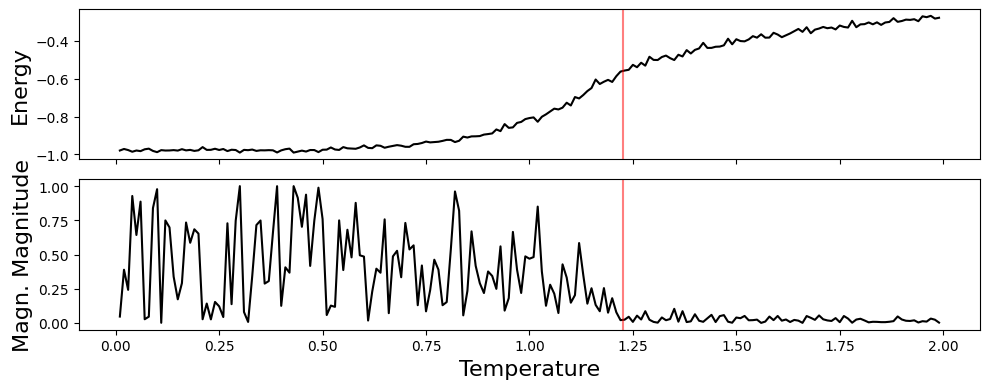

In [90]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

curie = 1.225

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

ax0.plot(temperatures, energies, color='black')
ax0.axvline(x = curie, color = 'r', alpha=0.5)
ax0.set_ylabel('Energy', fontsize=16)

ax1.plot(temperatures, [np.abs(m) for m in magnetizations], color='black')
ax1.axvline(x = curie, color = 'r', alpha=0.5)
ax1.set_ylabel('Magn. Magnitude', fontsize=16)

plt.xlabel('Temperature', fontsize=16)
plt.tight_layout()

plt.savefig('graphics/report_mcmc_phase.png')

In [76]:
lattices[1]

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1]])

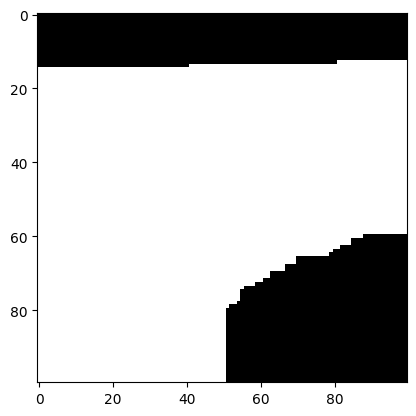

In [77]:
plt.imshow(lattices[1], 'binary', vmin=0, vmax=1)